In [1]:
!pip install pycocotools

In [9]:
!wget http://images.cocodataset.org/annotations/annotations_trainval2017.zip

--2020-05-13 02:31:38--  http://images.cocodataset.org/annotations/annotations_trainval2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.216.144.139
Connecting to images.cocodataset.org (images.cocodataset.org)|52.216.144.139|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 252907541 (241M) [application/zip]
Saving to: ‘annotations_trainval2017.zip’

annotations_trainva 100%[===================>] 241.19M  34.1MB/s    in 7.6s    

2020-05-13 02:31:46 (31.9 MB/s) - ‘annotations_trainval2017.zip’ saved [252907541/252907541]



In [10]:
!unzip annotations_trainval2017.zip

Archive:  annotations_trainval2017.zip
  inflating: annotations/instances_train2017.json  
  inflating: annotations/instances_val2017.json  
  inflating: annotations/captions_train2017.json  
  inflating: annotations/captions_val2017.json  
  inflating: annotations/person_keypoints_train2017.json  
  inflating: annotations/person_keypoints_val2017.json  


In [0]:
import numpy as np
from pycocotools.coco import COCO

import skimage.io as io
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

In [0]:
dataDir='.'
dataType='train2017'
annFile='{}/annotations/instances_{}.json'.format(dataDir,dataType)

In [14]:
# initialize COCO api for instance annotations
coco=COCO(annFile)

loading annotations into memory...
Done (t=16.00s)
creating index...
index created!


In [0]:
catIds = coco.getCatIds(catNms=['keyboard'])
imgIds = coco.getImgIds(catIds=catIds)

In [16]:
imgIds

[188416,
 73729,
 196608,
 417802,
 213003,
 417804,
 262162,
 253970,
 466967,
 458781,
 114729,
 188460,
 434222,
 286774,
 254007,
 491577,
 573501,
 139327,
 368706,
 335940,
 122953,
 573518,
 294990,
 163939,
 311395,
 565353,
 49258,
 581744,
 385150,
 499842,
 131203,
 57481,
 24721,
 516248,
 213148,
 565405,
 376988,
 393375,
 164005,
 114861,
 377007,
 434354,
 565429,
 254134,
 458935,
 442554,
 57542,
 245971,
 327892,
 188631,
 213207,
 254169,
 319706,
 90331,
 573659,
 426205,
 278752,
 205025,
 270570,
 368875,
 139503,
 540912,
 499958,
 90365,
 499966,
 229633,
 164103,
 557321,
 49424,
 237853,
 188702,
 16669,
 401703,
 24880,
 573749,
 287035,
 115005,
 74051,
 180549,
 164170,
 491851,
 139617,
 221540,
 360805,
 213351,
 459118,
 180593,
 8568,
 385401,
 369022,
 311678,
 98694,
 8583,
 385417,
 369036,
 205202,
 254356,
 418198,
 360855,
 459164,
 450974,
 221605,
 426421,
 541117,
 336324,
 229833,
 115146,
 66001,
 385492,
 254420,
 541157,
 369125,
 369126,


In [0]:
img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]

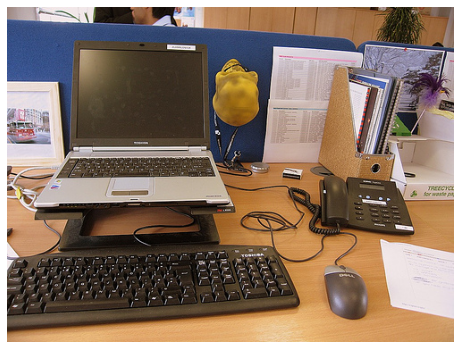

In [21]:
# load and display image
# I = io.imread('%s/images/%s/%s'%(dataDir,dataType,img['file_name']))
# use url to load image
I = io.imread(img['coco_url'])
plt.axis('off')
plt.imshow(I)
plt.show()

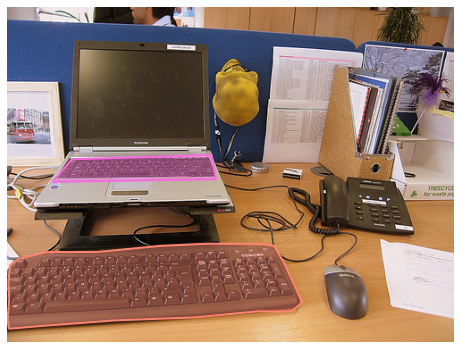

In [22]:

# load and display instance annotations
plt.imshow(I); plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)